# Preprocessing Data
- dealing with categorical features
- handling missing data
- encoding
- pipelines
- centering & scaling data

## Dealing with Categorical Features
- sklearn: OneHotEncoder()
- pandas: get_dummies()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso

sns.set()

In [2]:
cars = pd.read_csv('datasets/cars.csv')
cars.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [3]:
cars_dummies = pd.get_dummies(cars, drop_first=True)

In [4]:
X, y = cars_dummies.drop('mpg', axis=1), cars_dummies['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

ridge = Ridge(normalize=True)
params = {'alpha': np.linspace(0.1, 10, 15), 'solver': ['auto', 'svd', 'lsqr', 'cholesky', 'saga']}
ridge_cv = GridSearchCV(ridge, params, cv=5).fit(X_train, y_train)
print(f'Best parameters: {ridge_cv.best_params_}')
print(f'Best score: {ridge_cv.best_score_}')

Best parameters: {'alpha': 0.1, 'solver': 'saga'}
Best score: 0.7044482214324006


In [5]:
# best features 


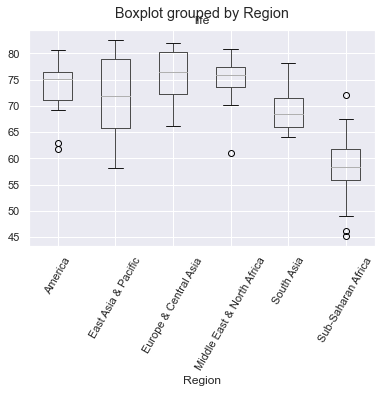

In [6]:
gapminder = pd.read_csv('datasets/gapminder.csv')

# Create a boxplot of life expectancy per region
gapminder.boxplot('life', 'Region', rot=60)

plt.show()

In [7]:
gapminder_dummies = pd.get_dummies(gapminder, drop_first=True)
gapminder_dummies.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')

In [8]:
from sklearn.model_selection import cross_val_score

X, y = gapminder_dummies.drop('life', axis=1), gapminder_dummies['life']


# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)
print(np.mean(ridge_cv))

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]
0.8329664719748985


# Handling Missing Data
Missing data can be of different types:
- 0
- ?
- -1 

In [9]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
diabetes.insulin.replace(0, np.nan, inplace=True)
diabetes.triceps.replace(0, np.nan, inplace=True)
diabetes.bmi.replace(0, np.nan, inplace=True)

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [15]:
# imputer
from sklearn.impute import SimpleImputer 
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']
imp = SimpleImputer(strategy='mean')
imp.fit(X)

X = imp.transform(X)

## Pipeline 

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, stratify=y)
imputer = SimpleImputer(strategy='mean')
logreg = LogisticRegression()
pipeline = make_pipeline(imputer, logreg)
pipeline.fit(X_train, y_train)

print(f'Train Score: {pipeline.score(X_train, y_train)}')
print(f'Test Score: {pipeline.score(X_test, y_test)}')

y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Train Score: 0.7975951903807615
Test Score: 0.724907063197026
[[146  29]
 [ 45  49]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       175
           1       0.63      0.52      0.57        94

    accuracy                           0.72       269
   macro avg       0.70      0.68      0.68       269
weighted avg       0.72      0.72      0.72       269



# Centering & Scaling
- standardization


In [26]:
red_wine = pd.read_csv('datasets/red_wine.csv', sep=';')
print(red_wine.info())
red_wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
from sklearn.preprocessing import scale

X, y = red_wine.drop('quality', axis=1), red_wine['quality']

X_scaled = scale(X)
print(np.mean(X_scaled), np.std(X_scaled))

-2.7647703016329102e-15 1.0


In [28]:
# scaling with pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipeline.fit(X_train, y_train)

print('With Standardization')
print(classification_report(y_test, pipeline.predict(X_test)))

print('Without Standardization')
knn = KNeighborsClassifier().fit(X_train, y_train)
print(classification_report(y_test, knn.predict(X_test)))

With Standardization
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.06      0.11        16
           5       0.63      0.69      0.66       204
           6       0.52      0.58      0.55       192
           7       0.61      0.38      0.47        60
           8       0.00      0.00      0.00         5

    accuracy                           0.57       480
   macro avg       0.38      0.29      0.30       480
weighted avg       0.57      0.57      0.56       480

Without Standardization
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.54      0.64      0.59       204
           6       0.48      0.51      0.49       192
           7       0.38      0.20      0.26        60
           8       0.00      0.00      0.00         5

    accuracy                    

In [39]:
# gridsearchcv with pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
params = dict(knn__n_neighbors=np.arange(1, 50))
gridsearch = GridSearchCV(pipeline, params)
gridsearch.fit(X_train, y_train)
print(f'Best Parameters: {gridsearch.best_params_}')
print(f'Best Score: {gridsearch.best_score_}')

Best Parameters: {'knn__n_neighbors': 25}
Best Score: 0.593401665598975


In [41]:
from sklearn.svm import SVC

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.60625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.62      0.79      0.69       127
           6       0.57      0.63      0.60       131
           7       0.75      0.29      0.41        42
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.32      0.28      0.28       320
weighted avg       0.58      0.61      0.57       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


In [42]:
# gapminder with pipeline
from sklearn.linear_model import ElasticNet 

X, y = gapminder.drop(['life', 'Region'], axis=1), gapminder['life']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)

steps = [('imputation', SimpleImputer()), ('scaler', StandardScaler()), ('elasticnet', ElasticNet())]
pipeline = Pipeline(steps)

parameters = {'elasticnet__l1_ratio': np.linspace(0, 1, 30)}
gridsearch = GridSearchCV(pipeline, parameters, cv=3)
gridsearch.fit(X_train, y_train)

# Compute and print the metrics
r2 = gridsearch.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gridsearch.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.7772871023494135
